6 病気や口コミの広がりをモデル化する―感染・情報伝搬

病気が感染するプロセスをモデル化することによって、爆発的感染を防ぐための指針などが得られる可能性があります。また逆に、ソーシャルメディアなどでの口コミの情報伝搬をモデル化することによって、限られた広告予算でなるべく多くの人に情報を拡散するための戦略を見出すことが期待できます。この章ではそのようなネットワーク上での情報伝搬のモデルを説明します。

6.1 SI model

SI modelは、$n$人のそれぞれがSusceptible(S)かInfected(I)かのいずれかであると仮定する(図9-1)。Sは感染していない状態、Iは感染している状態である。時刻$t$におけるSの人数を$S(t)$、Iの人数を$X(t)$、単位時間当たりに接する人数を$\beta$とすると、状態Sである確率が$S/n$、状態Iの人ひとりが状態Sの人と接する人数が$\beta S/n$、状態Iの人は$X$人いることから新たに感染する人数は$\beta SX/n$で表される。
それぞれの状態の人数の変化は以下の微分方程式で表される。

$\frac{dX}{dt}=\beta\frac{SX}{n}$

$\frac{dS}{dt}=-\beta\frac{SX}{n}$

状態S、状態Iの割合をそれぞれ$s=S/n$、$x=X/n$で表すと


$\frac{dｘ}{dt}=\beta sx$

$\frac{dｓ}{dt}=-\beta sx$

$n$人は状態SかIかのいずれかなので$S+X=n$、従って$s+x=1$であり、$s=1-x$を代入すると$\frac{dｘ}{dt}=\beta (1-x)x$であり、これを解くと$x(t)=\frac{x_{0}e^{\beta t}}{1-x_{0}+x_{0}e^{\beta t}}$となる。ただし$x_{0}$は時刻$t=0$における$x$の値である。以下のプログラムはこの関数の時間変化を表している。ただし$x_{0}=0.03$とし、$\beta$として5、8、10の値を取った場合を示している。時間が経つにつれて感染者が増大し、$\beta$が大きい場合は全員が感染することを示している。しかしながら、病気が実際にこのように感染することは稀である。なぜなら免疫が働いたり、感染者が死亡したり隔離されたりすることでさらなる感染が防止されることが多いからである。




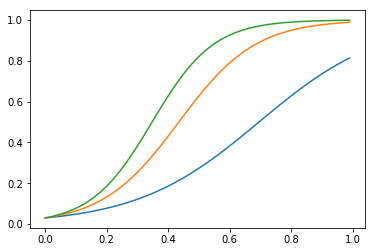

In [0]:
import matplotlib.pyplot as plt
from scipy import optimize, exp

x = range(100)
y = [0] * 100
x0 = 0.03
b = 5
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: x0 * exp(b * (x * 0.01))/(1 - x0 + x0 * exp(b * (x * 0.01))), x)))
b = 8
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: x0 * exp(b * (x * 0.01))/(1 - x0 + x0 * exp(b * (x * 0.01))), x)))
b = 10
plt.plot(list(map(lambda x: x * 0.01, x)), list(map(lambda x: x0 * exp(b * (x * 0.01))/(1 - x0 + x0 * exp(b * (x * 0.01))), x)))
plt.show()

6.2 SIR model

SI modelはSとIの2つの状態だけだったのに対し、SIR modelはSusceptible(S)、Infected(I)、Recoverd(R)の3つの状態を考え、状態Sの人が感染すると状態Iになり、さらに回復すると状態Rになるとする(図9-2)。単位時間当たりに接する人数を$\beta$、感染した人が回復する割合を$\gamma$、感染した人が回復までに要する時間を$\tau$とすると、$\delta\tau$の時間内に回復する確率は$\gamma\delta\tau$、回復しない確率は1-$\gamma\delta\tau$であり、時間$\tau$が経っても感染したままである確率は

$lim_{\delta\tau \rightarrow 0}(1-\gamma\delta\tau)^{\tau/\delta\tau}=e^{-\gamma\tau}$

である。また時間$\tau$だけ感染していて、$\tau$から$\tau+d\tau$の間に回復する確率$p(\tau)d\tau$は上記の値と$\gamma d\tau$との積で

$p(\tau)d\tau=\gamma e^{-\gamma\tau}d\tau$

となり、指数分布となる。これによると、多くの感染者は感染後すぐに回復するが、非常に長い期間感染する者も少数いることになる。現実の病気感染では、多くの感染者の感染期間ほぼ同じくらいの期間なので、このモデルは現実的ではないが、数学的にシンプルなのでこれを用いる。状態S、I、Rにある人の割合$s$、$x$、$r$は以下のように表せる。

$\frac{ds}{dt}=-\beta s x$

$\frac{dx}{dt}=\beta s x - \gamma x$

$\frac{dr}{dt}=\gamma x$

$s + x + r = 1$

第1式と第3式より$x$を消去すると$\frac{1}{s}\frac{ds}{dt}=-\frac{\beta}{\gamma}\frac{dr}{dt}$となり、$s=s_{0}e^{-\beta r/\gamma}$となる。ただし$s_{0}$は時刻$t=0$における$s$の値である。またこの式と第3式と第4式から
$\frac{dr}{dt}=\gamma(1-r-s_{0}e^{-\beta r/\gamma})$となるが、解析的に解くのは困難であり、数値的に解くのが一般的である。


9.3 NDlibによるシミュレーション

NDlibはネットワークにおける感染のシミュレーションを行うためのPythonソフトウエアパッケージである。数学、物理学、生物学、コンピュータサイエンス、社会科学などにおいて、シミュレーションのニーズがあると考えられる。NDlibはNetworkXをベースにしたものであり、https://ndlib.readthedocs.io/en/latest/index.html
からダウンロードできる(図9-3)。
 社会ネットワーク、生物ネットワーク、インフラネットワークにおける感染ダイナミクスを学ぶツールとして、また 多くの応用に適した感染モデルの標準的なプログラミングインターフェースを目指して作られたものである。
 
SIR modelにおける各状態の割合が時間を追って変化する過程を、 NDlibを用いてシミュレーションする。シミュレーションにおける入力は以下の通りである。

* 対象とするネットワーク
* $x_{0}$ (時刻$t=0$における状態Iの割合)
* $\beta$(状態Sから状態Iに変化する確率)
* $\gamma$(状態Iから状態Rに変化する確率)

出力は以下の通りである(図9-4)。

* 状態Sの割合($s$)、状態Iの割合($x$、状態Rの割合($r$)の時間変化
* 状態Sの割合($s$)、状態Iの割合($x$、状態Rの割合($r$)の各時刻での増減量

以下のプログラムは、1000の頂点が確率$p=0.1$でランダムに結ばれたランダムグラフにおいて、パラメータ値を$x_{0}=0.05$、$\beta=0.001$、$\gamma=0.01$と設定してSIR modelでの感染のシミュレーションを行うものである。

このプログラムにおいては、標準でないライブラリ(NDlib、Bokeh)のインストールをまず行った上で、パッケージをインポートしている。

プログラムを実行すると、状態Sの割合が単調に減少し、状態Iの割合が増加して減少に転じ、状態Rの割合が単調に増加していることがわかる。$S\rightarrow I \rightarrow R$の順に状態が変化し、初期状態において大多数が状態Sであることを考えると、このような時間変化になることは妥当である。

このプログラムにおいて、ネットワーク構造を変えたり、パラメータ値$x_{0}=0.05$、$\beta=0.001$、$\gamma=0.01$を変えたりすることによって、結果が大きく異なる場合がある。例えば直径の値が大きい(細長い)ネットワーク構造においては、感染に非常に時間がかかったり、途中で感染が止まったりする場合があることがわかる。

SI modelとSIR modelについて述べたが、感染モデルについてはこの他にもさまざまなバリエーションが考えられる。例えば、

* SIS model
* SIRS model

などがある。SIS modelは状態Sから状態Iになった後に状態Sに戻るモデルであり、SIRS modelは状態S、状態I、状態Rとなった後にさらに状態Sに戻るモデルである。これらのモデルにおいても、先のSIR modelでのシミュレーションと同じように、ネットワーク構造およびパラメータによって振舞いが大きく異なってくる。複雑なモデルほど説明できる現象が増えることが多いが、その反面パラメータが多くなったり、一般性が失われたりする。

感染モデルのシミュレーションの詳細については、NDlibのサイト(https://ndlib.readthedocs.io/en/latest/tutorial.html)に記載されている。







In [0]:
!pip install -q ndlib
!pip install -q bokeh

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import ndlib.models.epidemics.SIRModel as sir

g = nx.erdos_renyi_graph(1000, 0.1)
print(nx.info(g))

model = sir.SIRModel(g)

import ndlib.models.ModelConfig as mc

config = mc.Configuration()
config.add_model_parameter('beta', 0.001)
config.add_model_parameter('gamma', 0.01)
config.add_model_parameter("percentage_infected", 0.05)
model.set_initial_status(config)

iterations = model.iteration_bunch(200)
trends = model.build_trends(iterations)

from bokeh.io import output_notebook, show
output_notebook()
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

viz = DiffusionTrend(model, trends)
p = viz.plot(width=400, height=400)
show(p)

from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence
viz2 = DiffusionPrevalence(model, trends)
p2 = viz2.plot(width=400, height=400)
show(p2)


     |████████████████████████████████| 71kB 4.4MB/s 
Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 49937
Average degree:  99.8740


Loading BokehJS ...